In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
df = pd.read_csv("ToyotaCorolla.csv")
pd.set_option("display.max_columns",100)
df.head(3)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0


In [3]:
# Drop columns that are not useful.
# "Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"

dfc = df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
dfc.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [4]:
pd.isna(dfc).sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [5]:
pd.value_counts(dfc["cc"])

1600     845
1300     248
1400     164
2000     119
1900      30
1800      14
1587       4
1598       4
1332       2
1398       2
1995       2
16000      1
1975       1
Name: cc, dtype: int64

### Correlation matrix

<AxesSubplot:>

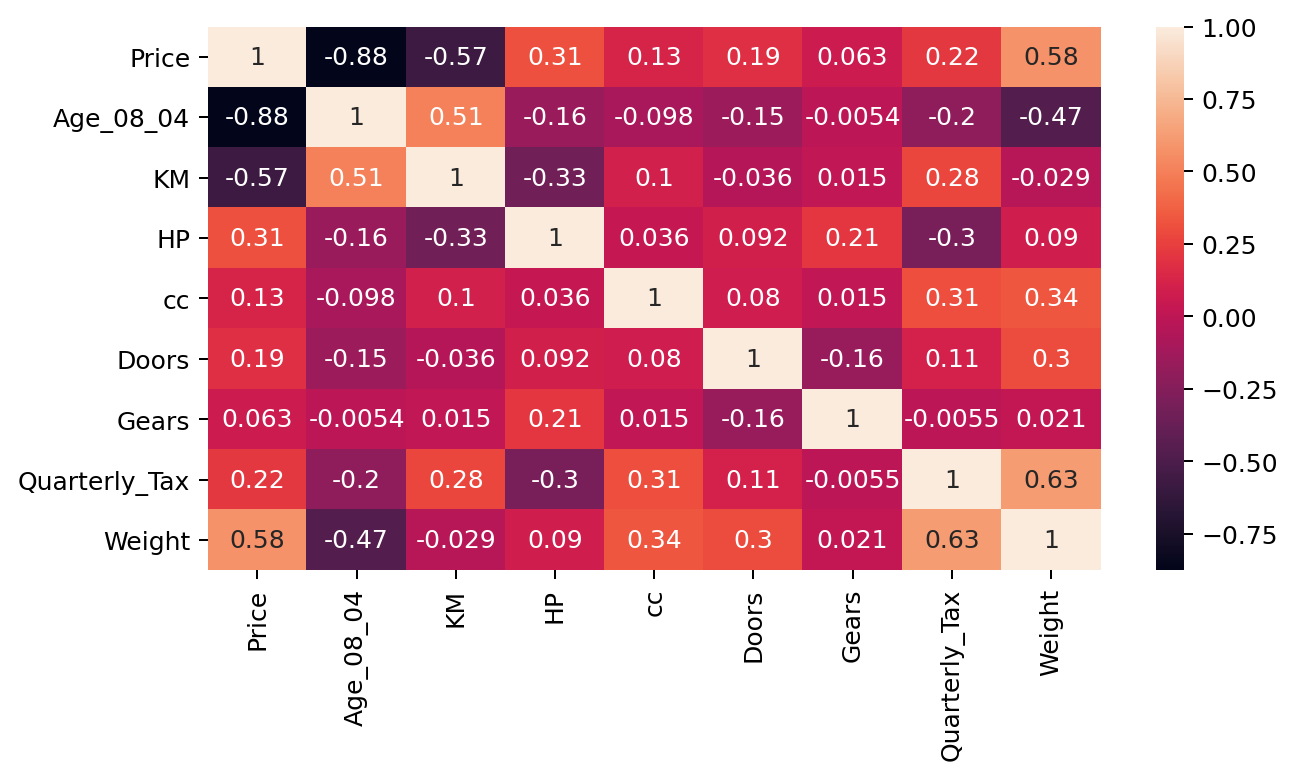

In [6]:
from matplotlib.pyplot import figure
figure(figsize=(8,4),dpi=180)
sns.heatmap(dfc.corr(),annot=True)

In [7]:
dfc = dfc.rename(columns={"Age_08_04":"Age","Quarterly_Tax":"QTax"})

In [8]:
model = smf.ols("Price~Age+KM+HP+cc+Doors+Gears+QTax+Weight",data=dfc).fit()

In [9]:
model.summary()
# p-value for doors is very high suggesting insignificance of features "doors" & "cc".

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Thu, 20 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:25:09   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
QTax           3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
model_ds = smf.ols("Price~Doors",data=dfc).fit()
model_ds.summary()

# AIC value is very high & r2 very low.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           1.46e-12
Time:                        14:25:09   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
model_cc = smf.ols("Price~cc",data=dfc).fit()
model_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           1.55e-06
Time:                        14:25:09   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
model_ds_cc = smf.ols("Price~Doors+cc",data=dfc).fit()
model_ds_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           1.15e-15
Time:                        14:25:09   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
cc             0.9597      0.221      4.340      0.000       0.526       1.393
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### VIF

In [13]:
# Age+KM+HP+cc+Doors+Gears+QTax+Weight
rsq_age = smf.ols('Age~KM+HP+cc+Doors+Gears+QTax+Weight',data=dfc).fit().rsquared  
vif_age = 1/(1-rsq_age) 

rsq_km = smf.ols('KM~Age+HP+cc+Doors+Gears+QTax+Weight',data=dfc).fit().rsquared  
vif_km = 1/(1-rsq_km) 

rsq_cc = smf.ols('cc~Age+HP+KM+Doors+Gears+QTax+Weight',data=dfc).fit().rsquared  
vif_cc = 1/(1-rsq_cc) 

rsq_dr = smf.ols('Doors~Age+HP+cc+KM+Gears+QTax+Weight',data=dfc).fit().rsquared  
vif_dr = 1/(1-rsq_dr)

rsq_hp = smf.ols('HP~Age+Doors+cc+KM+Gears+QTax+Weight',data=dfc).fit().rsquared  
vif_hp = 1/(1-rsq_hp)

rsq_gr = smf.ols('Gears~Age+HP+cc+KM+Doors+QTax+Weight',data=dfc).fit().rsquared  
vif_gr = 1/(1-rsq_gr)

rsq_qt = smf.ols('QTax~Age+HP+cc+KM+Doors+Gears+Weight',data=dfc).fit().rsquared  
vif_qt = 1/(1-rsq_qt)

rsq_wt = smf.ols('Weight~Age+HP+cc+KM+Doors+Gears+QTax',data=dfc).fit().rsquared  
vif_wt = 1/(1-rsq_wt)

# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','cc','Doors','HP','Gears','QTax','WT'],'VIF':[vif_age,vif_km,vif_cc,vif_dr,vif_hp,vif_gr,vif_qt,vif_wt]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

# There don't seem to be any absard values of VIF.

,Variables,VIF
0,Age,1.884620
1,KM,1.756905
2,cc,1.163894
3,Doors,1.156575
4,HP,1.419422
5,Gears,1.098723
6,QTax,2.311431
7,WT,2.516420


### Residual Analysis

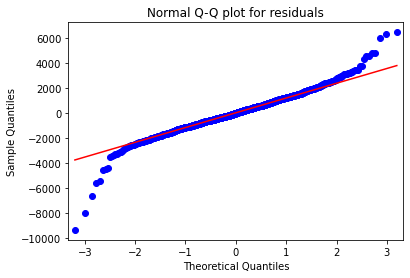

In [14]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line="q")
plt.title("Normal Q-Q plot for residuals")
plt.show()
# The distribution seems normal but has some outliers.

### Residual plot for Homoscedasticity

In [15]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

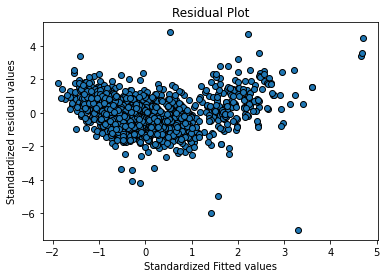

In [16]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid),edgecolors="black")

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()
# There is no apperent pattern visible.

### Residuals vs Regressors

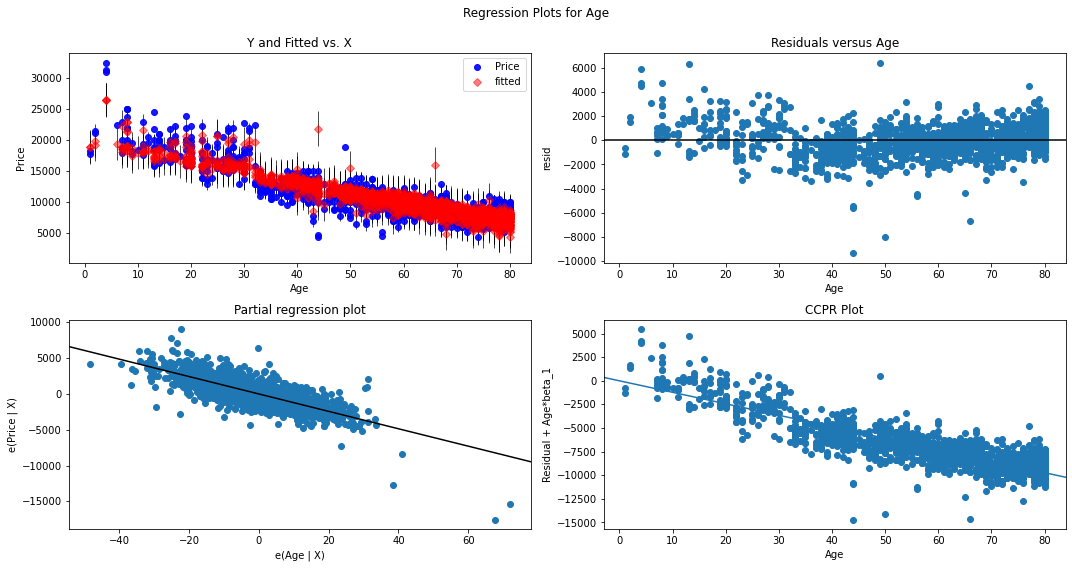

In [17]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

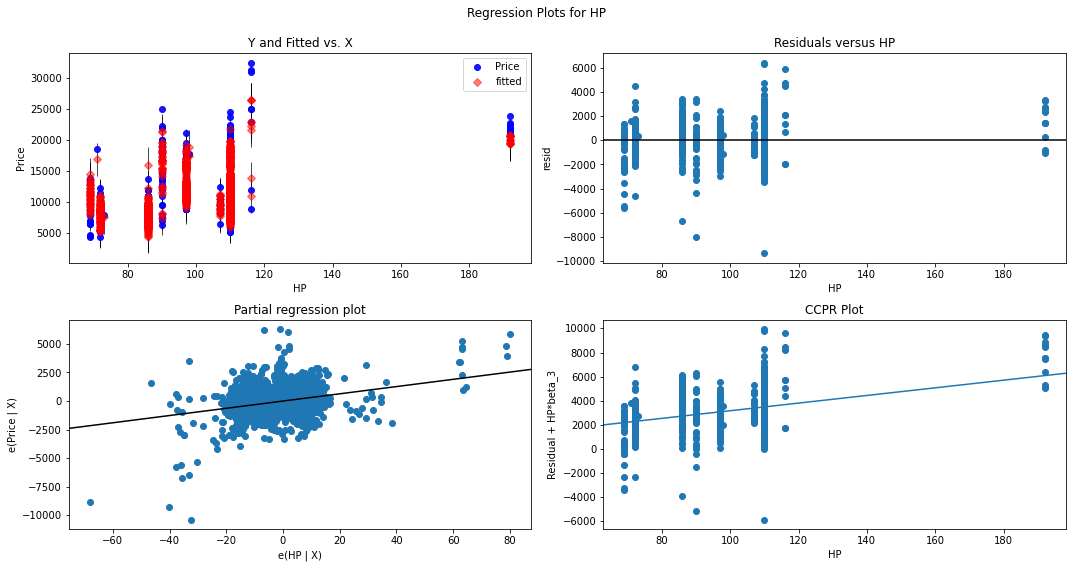

In [18]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

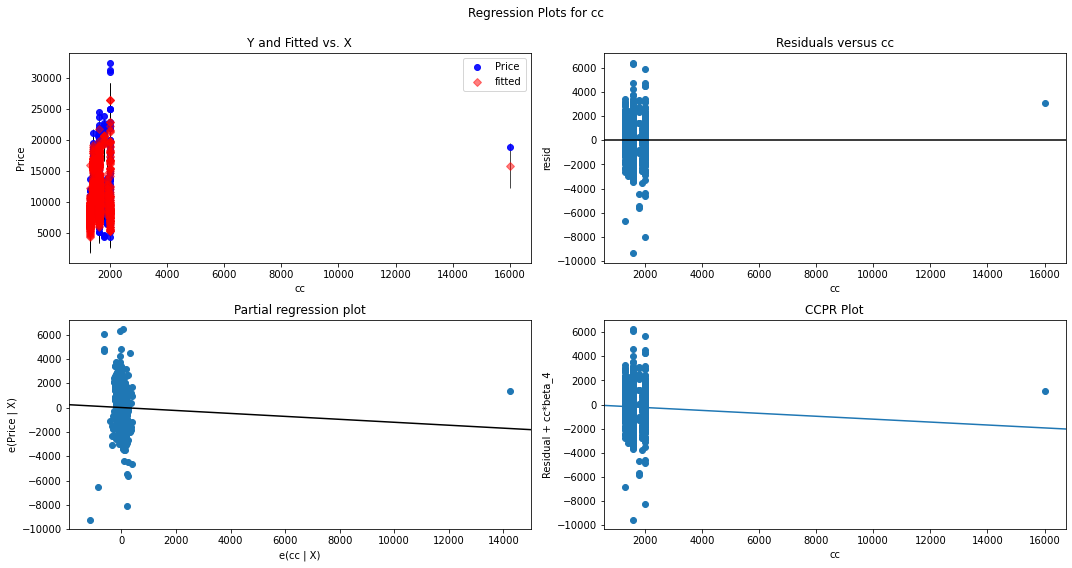

In [19]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

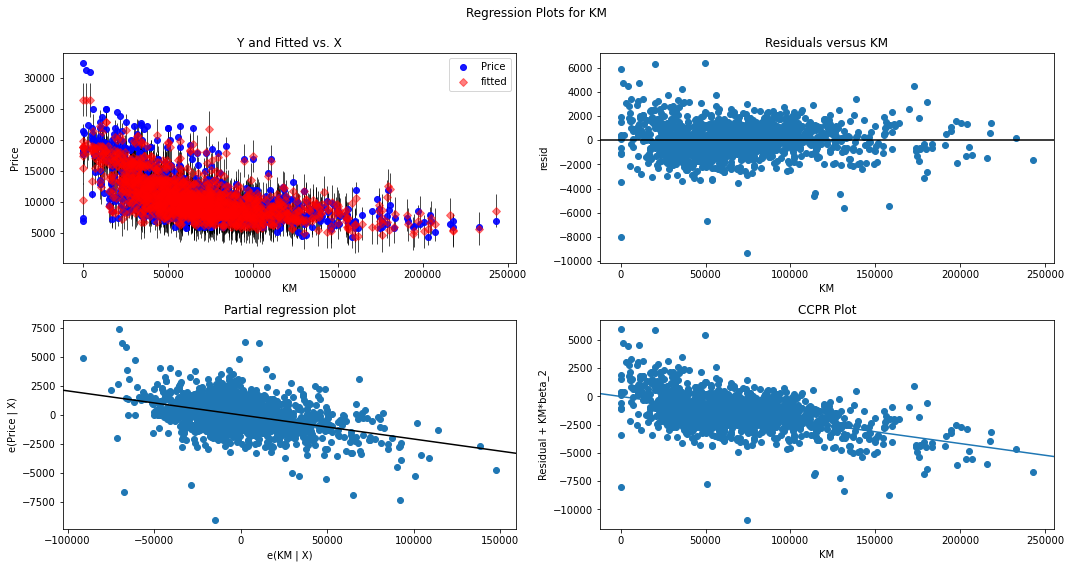

In [20]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

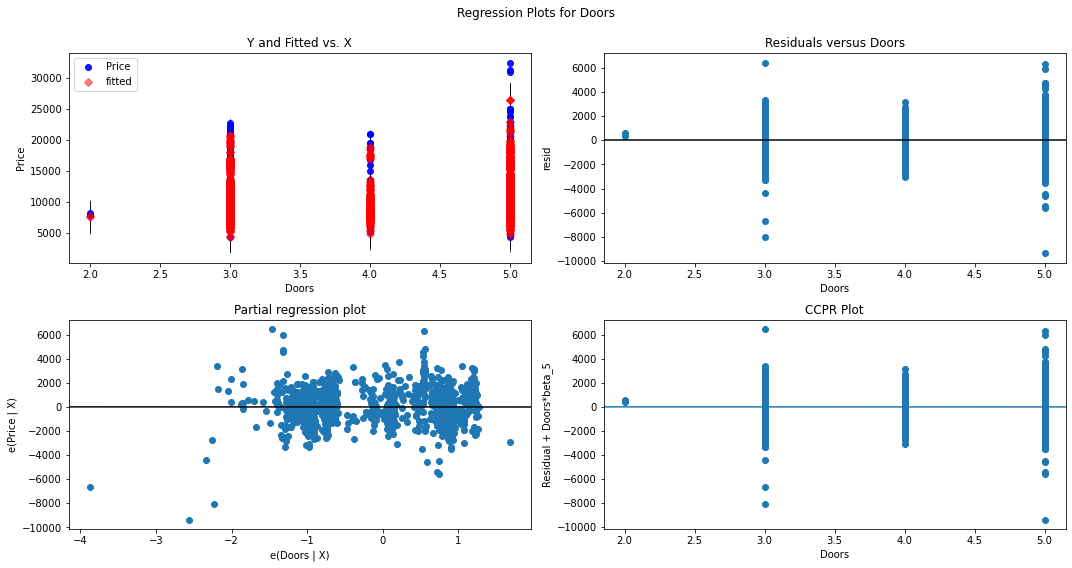

In [21]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

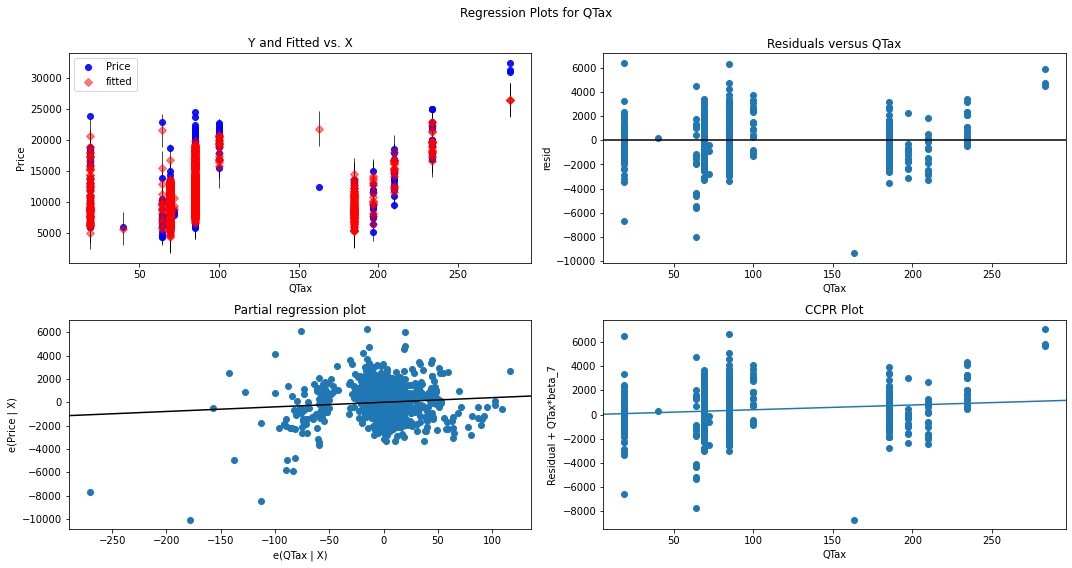

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "QTax", fig=fig)
plt.show()

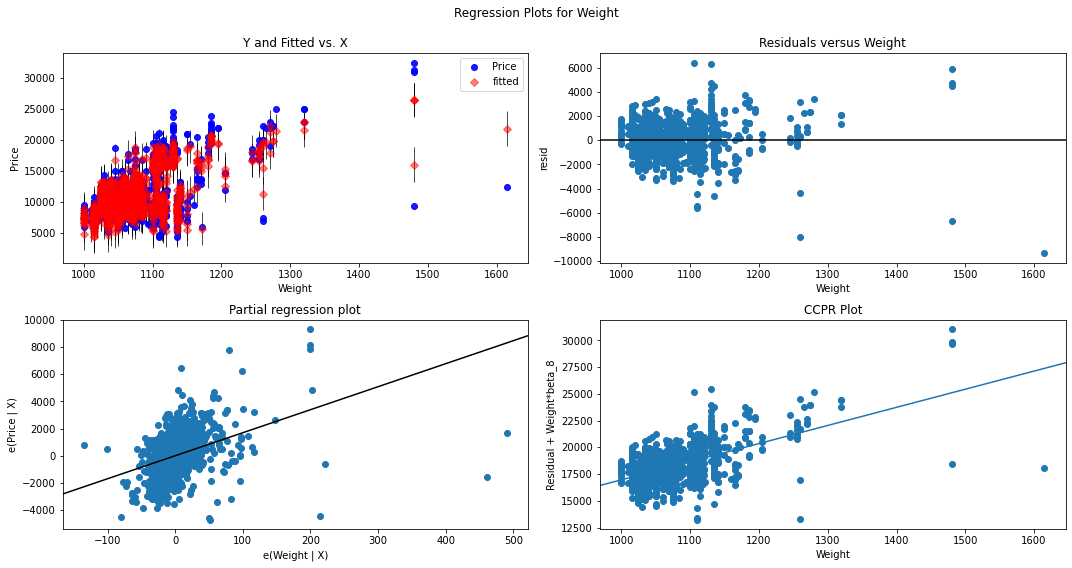

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

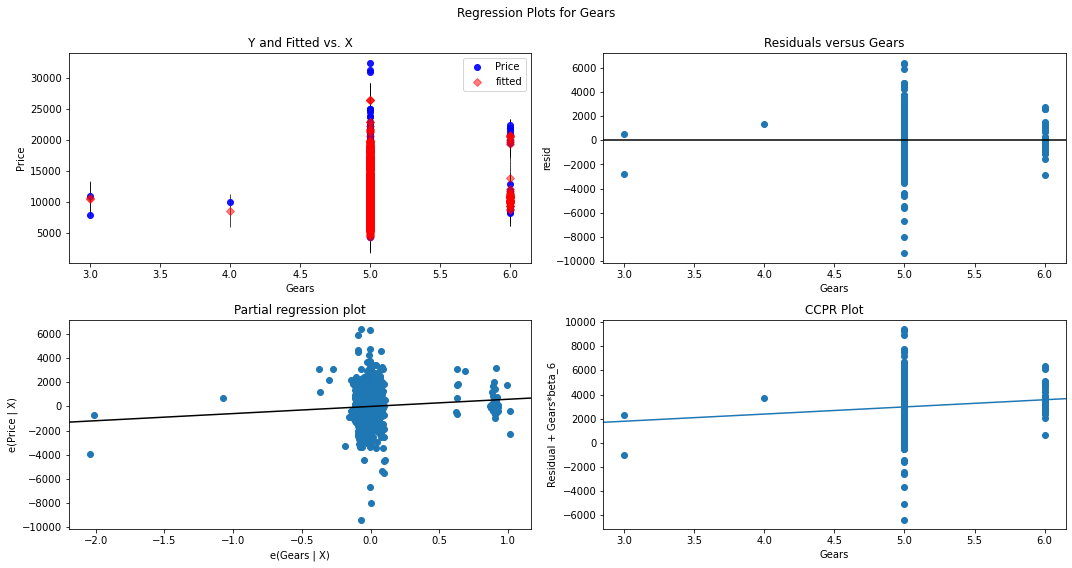

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

In [25]:
# None of the features have any relation with residuals.

### Model deletion diagnostics
#### Detecting Outliers/Influencers

### Cook's distance

In [26]:
model_influence = model.get_influence()
(c, d) = model_influence.cooks_distance

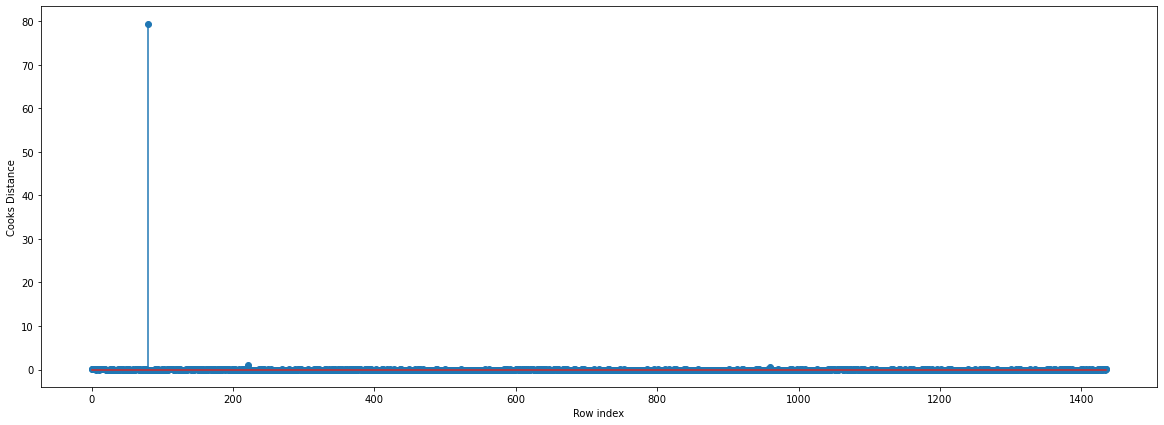

In [27]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(dfc)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

### High Influence points


In [28]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 79.52010624137755)

<Figure size 1440x360 with 0 Axes>

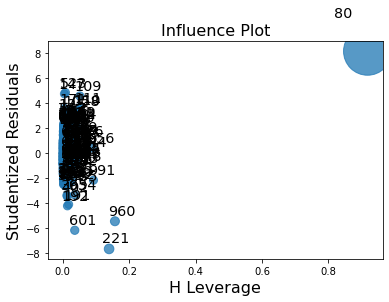

In [29]:
from statsmodels.graphics.regressionplots import influence_plot
figure(figsize=(20,5))
influence_plot(model)
plt.show()
# 80 is quiet big outlier as seen in both plots.

In [30]:
# Checking data at point 80 and comparing it other values.
dfc[dfc.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [31]:
dfc.head(3)

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165


### Improving the model


In [32]:
# Dropping the outlier.
dfc_1 = dfc.drop(dfc.index[80],axis=0).reset_index()
dfc_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   index   1435 non-null   int64
 1   Price   1435 non-null   int64
 2   Age     1435 non-null   int64
 3   KM      1435 non-null   int64
 4   HP      1435 non-null   int64
 5   cc      1435 non-null   int64
 6   Doors   1435 non-null   int64
 7   Gears   1435 non-null   int64
 8   QTax    1435 non-null   int64
 9   Weight  1435 non-null   int64
dtypes: int64(10)
memory usage: 112.2 KB


### Building new model

In [33]:
# Excluding Doors column as p-value was very high suggesting insignificance.
model_1 = smf.ols("Price~Age+KM+HP+cc+Gears+QTax+Weight",data=dfc_1).fit()

In [34]:
model_1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1356.
Date:                Thu, 20 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:25:17   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1427   BIC:                         2.473e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6313.9396   1381.857     -4.569      0.000   -9024.628   -3603.251
Age         -120.4577      2.561    -47.031      0.000    -125.482    -115.433
KM            -0.0179      0.001    -14.029      0.000      -0.020      -0.015
HP            39.1593      2.898     13.512      0.000      33.474      44.844
cc            -2.5069      0.306     -8.188      0.000      -3.107      -1.906
Gears        549.7311    189.216      2.905      0.004     178.561     920.902
QTax           9.0759      1.424      6.374      0.000       6.283      11.869
Weight        19.9623      1.076     18.547      0.000      17.851      22.074
==============================================================================
Omnibus:                      239.713   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2556.740
Skew:                          -0.425   Prob(JB):                         0.00
Kurtosis:                       9.484   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Cook's distance

In [35]:
model_influence_2 = model_1.get_influence()
(c2, d2) = model_influence_2.cooks_distance

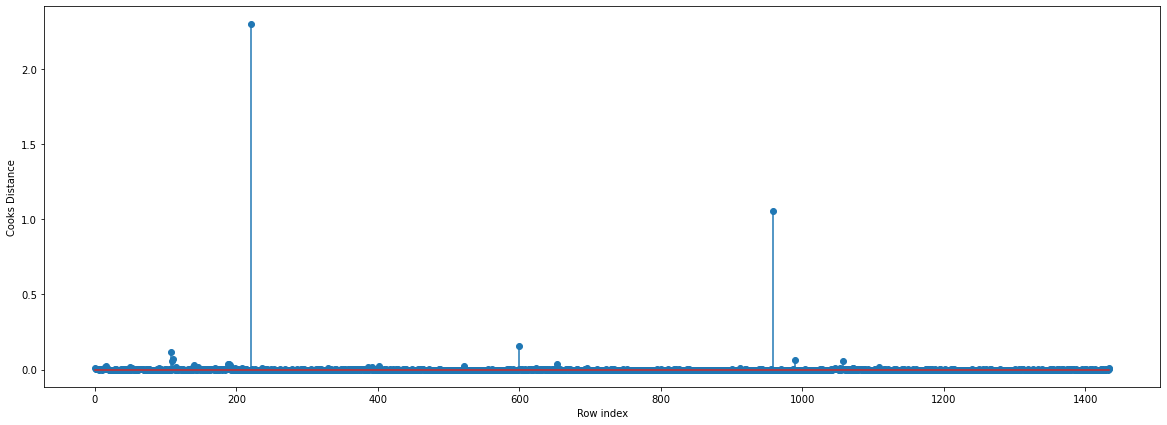

In [36]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(dfc_1)),np.round(c2,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [37]:
#index and value of influencer
(np.argmax(c2),np.max(c2))

(220, 2.3034451664541264)

<Figure size 3600x720 with 0 Axes>

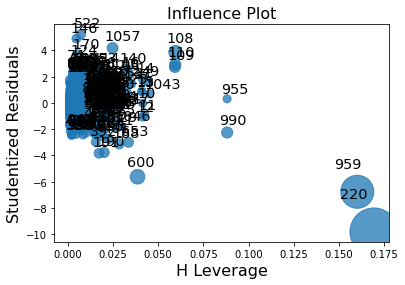

In [38]:
from statsmodels.graphics.regressionplots import influence_plot
figure(figsize=(50,10))
influence_plot(model_1)
plt.show()

In [39]:
# data points 959 and 220 are major outliers, so we need to drop these points. 
dfc_2 = dfc_1.drop(dfc_1.index[[959,220]],axis=0).reset_index()

In [40]:
dfc_3 = dfc_2.drop(["index","level_0"],axis=1)
dfc_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1433 non-null   int64
 1   Age     1433 non-null   int64
 2   KM      1433 non-null   int64
 3   HP      1433 non-null   int64
 4   cc      1433 non-null   int64
 5   Doors   1433 non-null   int64
 6   Gears   1433 non-null   int64
 7   QTax    1433 non-null   int64
 8   Weight  1433 non-null   int64
dtypes: int64(9)
memory usage: 100.9 KB


### Building new model 

In [41]:
# Building a model on new data.
model_3 = smf.ols("Price~Age+KM+HP+cc+Gears+QTax+Weight",data=dfc_3).fit()
(model_3.rsquared,model_3.pvalues)
# r2 has improved to 88.4%.

(0.8843226794628847,
 Intercept     3.334170e-23
 Age          8.335503e-278
 KM            1.340510e-43
 HP            5.022290e-37
 cc            1.263544e-32
 Gears         1.175941e-03
 QTax          5.765968e-05
 Weight       3.182093e-106
 dtype: float64)

In [42]:
model_influence_3 = model_3.get_influence()
(c3, d3) = model_influence_3.cooks_distance

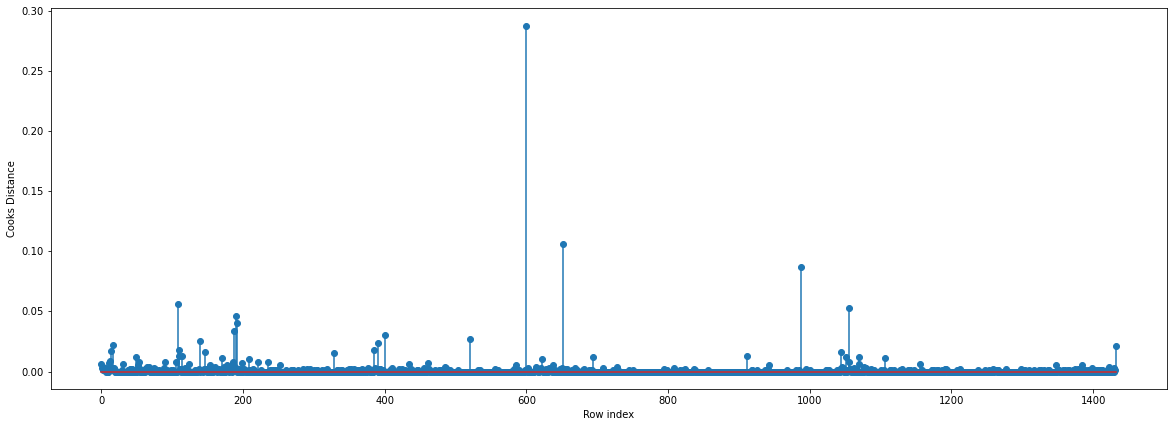

In [43]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(dfc_3)),np.round(c3,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

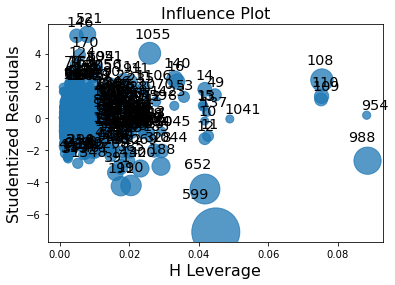

In [44]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_3)
plt.show()

In [45]:
# Data point with extreme outlier.
(np.argmax(c3),np.max(c3))

(599, 0.2877229363895601)

In [46]:
# data points 599 & 652 are major outliers, so we need to drop those points. 
dfc_4 = dfc_3.drop(dfc_3.index[[599,652]],axis=0).reset_index()
dfc_4.head(2)

,index,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165


In [47]:
dfc_4 = dfc_4.drop(["index"],axis=1)

In [48]:
# Building a model on new data.
model_4 = smf.ols("Price~Age+KM+HP+cc+Gears+QTax+Weight",data=dfc_4).fit()
(model_4.rsquared,model_4.pvalues)

# r2 has improved to 88.9%.

(0.8899467353960968,
 Intercept     1.100573e-30
 Age          1.047727e-276
 KM            2.098725e-48
 HP            2.198086e-31
 cc            2.367610e-31
 Gears         4.594989e-04
 QTax          2.542703e-02
 Weight       4.895855e-120
 dtype: float64)

### Predicting for new value

In [49]:
predictions = model_4.predict(dfc)

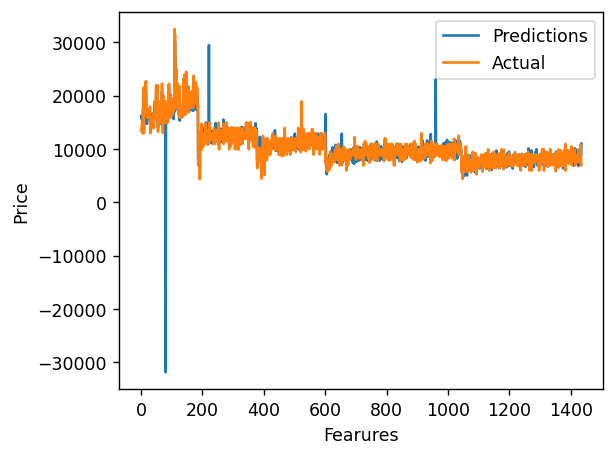

In [56]:
from matplotlib.pyplot import figure
figure(figsize=(5,4),dpi=125)
plt.plot(predictions,label='Predictions')
plt.plot(df["Price"],label='Actual')
plt.xlabel("Fearures")
plt.ylabel("Price")
plt.legend()